## Pace of Play in the NBA

Examining the increase in pace from the 2004-05 to 2019-20 NBA seasons. 

The pace of play in the NBA has increased dramatically over the past 15+ years thanks to rule changes, increase in 3-point attempts, and other factors. Here we will explore data from Basketball Reference to visualize this trend. 

The data was downloaded from Basketball Reference in csv format by season. As an example, see the 'Miscellaneous Stats' table of the [2019-20 NBA Season Summary](https://www.basketball-reference.com/leagues/NBA_2020.html) page. 

We then import pandas and combine each of the individual season files into one dataframe. 

In [1]:
import pandas as pd

In [2]:
seasons = ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', 
           '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
           '2016-17', '2017-18', '2018-19', '2019-20']
data = pd.DataFrame(columns=['Season', 'Team_Name', 'Pace', 'Playoffs', 'Win_Pct'])
for s in seasons:
    df = pd.read_csv(s + '_pace.csv').dropna()
    df['Season'] = s
    df['Playoffs'] = df['Team'].map(lambda x: "Playoff Team" if x[-1:] == '*' else "Non-playoff Team")
    df['Team_Name'] = df['Team'].map(lambda x: x[:-1] if x[-1:] == '*' else x)
    df['Win_Pct'] = df['W'] / (df['W'] + df['L'])
    data = data.append(df[['Season', 'Team_Name', 'Pace', 'Playoffs', 'Win_Pct']], ignore_index=True)

yr_dict = {season: int(season[:2] + season[-2:]) for season in seasons}
data['Year'] = data['Season'].map(yr_dict)
data['Season_Avg'] = data.groupby('Season').Pace.transform('mean')

data.head()

,Season,Team_Name,Pace,Playoffs,Win_Pct,Year,Season_Avg
0,2004-05,San Antonio Spurs,88.9,Playoff Team,0.719512,2005,90.926667
1,2004-05,Phoenix Suns,95.9,Playoff Team,0.756098,2005,90.926667
2,2004-05,Dallas Mavericks,92.7,Playoff Team,0.707317,2005,90.926667
3,2004-05,Miami Heat,90.8,Playoff Team,0.719512,2005,90.926667
4,2004-05,Houston Rockets,88.8,Playoff Team,0.621951,2005,90.926667


In [27]:
import matplotlib.pyplot as plt

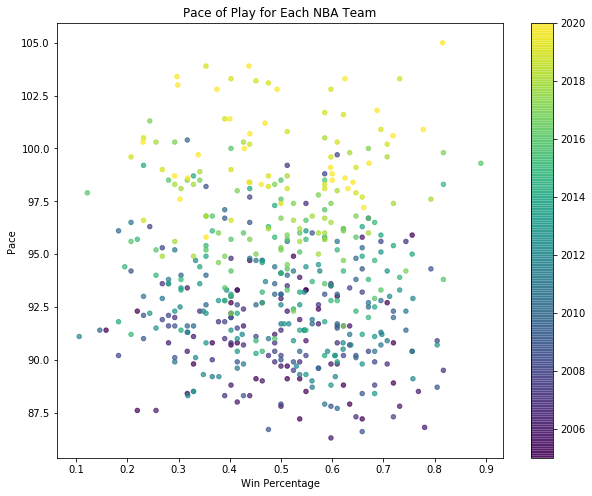

In [18]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(x=data['Win_Pct'], y=data['Pace'], c=data['Year'], label=data['Year'], alpha=0.7, s=20)

plt.colorbar()
plt.title('Pace of Play for Each NBA Team')
plt.xlabel('Win Percentage')
plt.ylabel('Pace')
plt.show()

In [19]:
import seaborn as sns

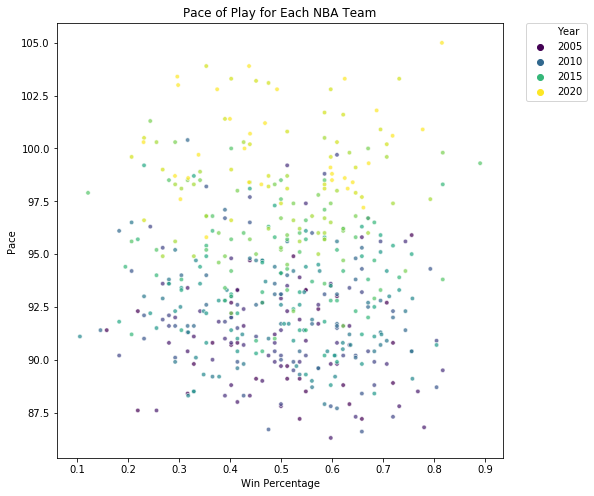

In [21]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=data, x='Win_Pct', y='Pace', hue='Year', palette='viridis', alpha=0.7, s=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Pace of Play for Each NBA Team')
plt.xlabel('Win Percentage')
plt.ylabel('Pace')
plt.show()

The above plot is not the most useful, but it shows that pace is not strongly correlated with win percentage. You can also see that pace has increased over time for all teams regardless of win percentage. Season and pace appear to be more strongly correlated, which is expected. 

In [22]:
playoff_data = data[data['Playoffs'] == 'Playoff Team'].reset_index(drop=True)
playoff_data['PO_Avg'] = playoff_data.groupby('Season').Pace.transform('mean')
playoff_data['Error'] = playoff_data.groupby('Season').Pace.transform('std')

non_playoff_data = data[data['Playoffs'] == 'Non-playoff Team'].reset_index(drop=True)
non_playoff_data['PO_Avg'] = non_playoff_data.groupby('Season').Pace.transform('mean')
non_playoff_data['Error'] = non_playoff_data.groupby('Season').Pace.transform('std')
playoff_data.head(10)

,Season,Team_Name,Pace,Playoffs,Win_Pct,Year,Season_Avg,PO_Avg,Error
0,2004-05,San Antonio Spurs,88.9,Playoff Team,0.719512,2005,90.926667,91.0875,2.856776
1,2004-05,Phoenix Suns,95.9,Playoff Team,0.756098,2005,90.926667,91.0875,2.856776
2,2004-05,Dallas Mavericks,92.7,Playoff Team,0.707317,2005,90.926667,91.0875,2.856776
3,2004-05,Miami Heat,90.8,Playoff Team,0.719512,2005,90.926667,91.0875,2.856776
4,2004-05,Houston Rockets,88.8,Playoff Team,0.621951,2005,90.926667,91.0875,2.856776
5,2004-05,Detroit Pistons,87.2,Playoff Team,0.658537,2005,90.926667,91.0875,2.856776
6,2004-05,Memphis Grizzlies,88.5,Playoff Team,0.548780,2005,90.926667,91.0875,2.856776
7,2004-05,Seattle SuperSonics,87.9,Playoff Team,0.634146,2005,90.926667,91.0875,2.856776
8,2004-05,Sacramento Kings,93.0,Playoff Team,0.609756,2005,90.926667,91.0875,2.856776
9,2004-05,Denver Nuggets,93.5,Playoff Team,0.597561,2005,90.926667,91.0875,2.856776


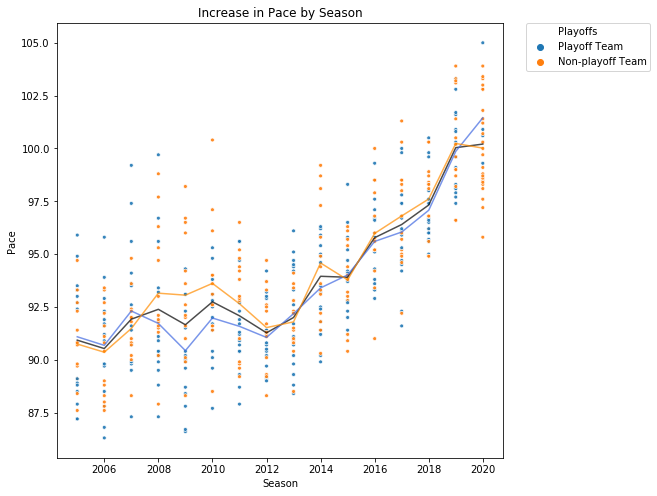

In [23]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(data=data, x='Year', y='Pace', hue='Playoffs', alpha=0.9, s=15)
plt.plot(data.Year, data['Season_Avg'], color='k', alpha=0.7)
plt.plot(playoff_data.Year, playoff_data['PO_Avg'], color='royalblue', alpha=0.7)
plt.plot(non_playoff_data.Year, non_playoff_data['PO_Avg'], color='darkorange', alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Increase in Pace by Season')
plt.xlabel('Season')
plt.ylabel('Pace')
plt.show()

This plot shows the increase in pace by season for every NBA team. Both playoff teams and non-playoff teams show a similar trend of steadily increasing pace since the 2012 season. The trendlines show the average pace for playoff teams in blue, non-playoff teams in orange, and the overall league average in black. The next figure shows just the average lines without the noise of individual data points. 

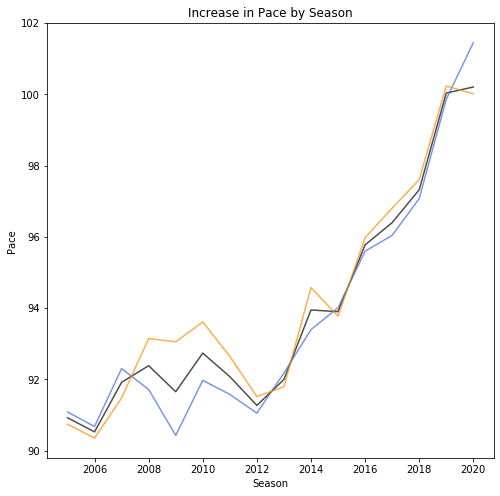

In [24]:
fig = plt.figure(figsize=(8, 8))
plt.plot(data['Year'], data['Season_Avg'], color='k', alpha=0.7)
plt.plot(playoff_data['Year'], playoff_data['PO_Avg'], color='royalblue', alpha=0.7)
plt.plot(non_playoff_data['Year'], non_playoff_data['PO_Avg'], color='darkorange', alpha=0.7)

plt.title('Increase in Pace by Season')
plt.xlabel('Season')
plt.ylabel('Pace')
plt.show()

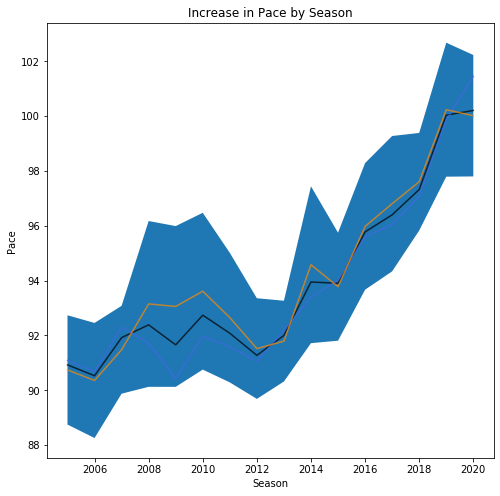

In [25]:
fig = plt.figure(figsize=(8, 8))
plt.plot(data['Year'], data['Season_Avg'], color='k', alpha=0.7)
plt.plot(playoff_data['Year'], playoff_data['PO_Avg'], color='royalblue', alpha=0.7)
plt.plot(non_playoff_data['Year'], non_playoff_data['PO_Avg'], color='darkorange', alpha=0.7)

plt.fill_between(non_playoff_data.Year, non_playoff_data['PO_Avg']-non_playoff_data['Error'], non_playoff_data['PO_Avg']+non_playoff_data['Error'])

plt.title('Increase in Pace by Season')
plt.xlabel('Season')
plt.ylabel('Pace')
plt.show()

The lines show increases in pace over time for playoff and non-playoff teams. From 2008 to 2012, teams that made the playoffs have a niticeably higher pace than teams that did not. The error plot above shows that although this difference existed, the difference is within the margin of error. For such a small sample size of $n=3$ NBA teams, it would take a dramatic difference to see a significant result outside the error. 

From 2012 to 2020, the pace increased for all teams and the difference between playoff and non-playoff teams is small. 

In [26]:
from mpl_toolkits import mplot3d

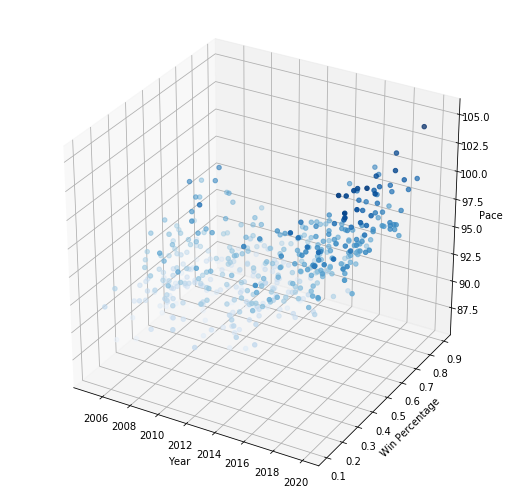

In [12]:
fig = plt.figure(figsize=(9, 9))
ax = plt.axes(projection='3d')
ax.scatter3D(data['Year'], data['Win_Pct'], data['Pace'], c=data['Pace'], cmap='Blues');

ax.set_xlabel('Year')
ax.set_ylabel('Win Percentage')
ax.set_zlabel('Pace')
plt.show()

In [14]:
import matplotlib.gridspec as gridspec
import numpy as np

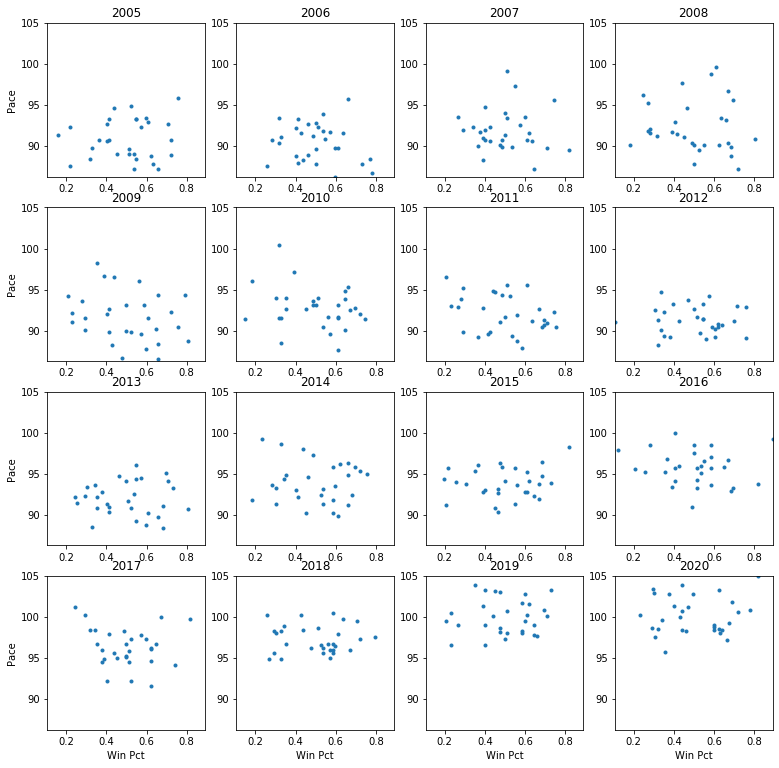

In [41]:
fig = plt.figure(figsize=(13, 13))
G = gridspec.GridSpec(4, 4)

xmin = min(data['Win_Pct'])
xmax = max(data['Win_Pct'])
ymin = min(data['Pace'])
ymax = max(data['Pace'])

for c in range(16):
    i, j = divmod(c, 4)
    ax = plt.subplot(G[i, j])
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.plot(data[data['Year'] == 2005+c]['Win_Pct'], data[data['Year'] == 2005+c]['Pace'], '.')
    ax.set_title(2005+c)
    
    if i == 3: ax.set(xlabel='Win Pct')
    if j == 0: ax.set(ylabel='Pace')
    
plt.show()